In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel ('training&valid.xlsx')
df.Label.value_counts()

Bukan Kasus    476
Kasus          268
Name: Label, dtype: int64

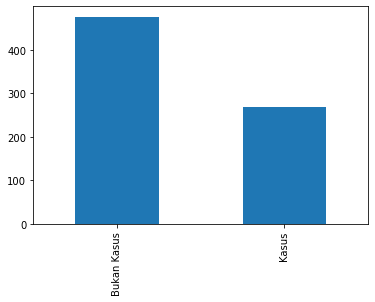

In [3]:
df['Label'].value_counts().plot(kind= 'bar')

In [4]:
def ProTweets(text):
    text = text.lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('http\S+', '', text)
    return text

df['Tweet'] = df['Tweet'].apply(lambda x: ProTweets(x))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df['Tweet'], df['Label'],test_size=0.25, random_state=10)

In [6]:
print("X_train_shape : ",X_train.shape)
print("X_valid_shape : ",X_valid.shape)
print("y_train_shape : ",y_train.shape)
print("y_valid_shape : ",y_valid.shape)

X_train_shape :  (558,)
X_valid_shape :  (186,)
y_train_shape :  (558,)
y_valid_shape :  (186,)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_unigram = CountVectorizer(ngram_range=(1,1))
count_train_unigram = count_unigram.fit_transform(X_train)
count_valid_unigram = count_unigram.transform(X_valid)
print('{} Number of tweets has {} words'.format(count_train_unigram.shape[0], count_train_unigram.shape[1]))
print('{} Number of tweets has {} words'.format(count_valid_unigram.shape[0], count_valid_unigram.shape[1]))

558 Number of tweets has 1886 words
186 Number of tweets has 1886 words


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_bigram = CountVectorizer(ngram_range=(2,2)) 
count_train_bigram = count_bigram.fit_transform(X_train)
count_valid_bigram = count_bigram.transform(X_valid)
print('{} Number of tweets has {} words'.format(count_train_bigram.shape[0], count_train_bigram.shape[1]))
print('{} Number of tweets has {} words'.format(count_valid_bigram.shape[0], count_valid_bigram.shape[1]))

558 Number of tweets has 3943 words
186 Number of tweets has 3943 words


In [9]:
count_df_unigram = pd.DataFrame(count_train_unigram.toarray(), columns=count_unigram.get_feature_names())
count_df_unigram

,01xe2x80xa6,02,021,0614kota,07gatak,0800,0801,0854,091105lbs,091108nns,...,yangxe2x80xa6,yannkena,yanxe2x80xa6,yg,yng,yogya,yogyakarta,yonif,zika,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
count_df_bigram = pd.DataFrame(count_train_bigram.toarray(), columns=count_bigram.get_feature_names())
count_df_bigram

,02 kelurahan,021 51010350,0614kota cirebon,07gatak dan,0800 wib,0801 pacitan,0854 beritasonora,091105lbs bekerjasama,091108nns laksanakan,0911nunukan instruksikan,...,yng bisa,yogya capai,yogya hampir,yogyakarta melaporkan,yogyakarta mencatat,yogyakarta waspada,yonif 623bwu,zika berikut,zika dengue,zona hijau
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes Classifier
bnb_unigram = BernoulliNB().fit(count_train_unigram, y_train)
bnb_bigram = BernoulliNB().fit(count_train_bigram, y_train)

In [15]:
valid_unigram = bnb_unigram.predict(count_valid_unigram)
valid_bigram = bnb_bigram.predict(count_valid_bigram)

Besar Accuracy:  0.8709677419354839


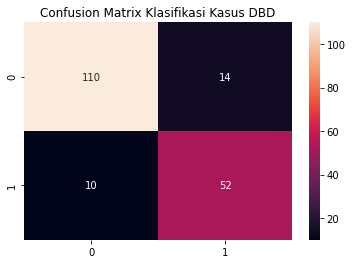

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score_bnb = metrics.accuracy_score(valid_unigram, y_valid)
print("Besar Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(valid_unigram, y_valid), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.show()

Besar Accuracy:  0.8172043010752689


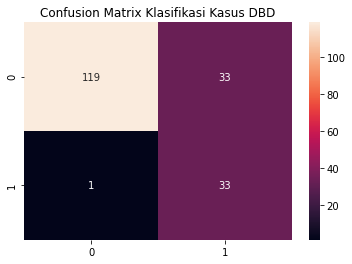

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score_bnb = metrics.accuracy_score(valid_bigram, y_valid)
print("Besar Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(valid_bigram, y_valid), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, valid_unigram))
print(classification_report(y_valid, valid_bigram))

              precision    recall  f1-score   support

 Bukan Kasus       0.89      0.92      0.90       120
       Kasus       0.84      0.79      0.81        66

    accuracy                           0.87       186
   macro avg       0.86      0.85      0.86       186
weighted avg       0.87      0.87      0.87       186

              precision    recall  f1-score   support

 Bukan Kasus       0.78      0.99      0.88       120
       Kasus       0.97      0.50      0.66        66

    accuracy                           0.82       186
   macro avg       0.88      0.75      0.77       186
weighted avg       0.85      0.82      0.80       186



In [21]:
dt = pd.read_excel ('data_test.xlsx')
dt.Label.value_counts()

Kasus          126
Bukan Kasus     60
Name: Label, dtype: int64

In [22]:
dt['Tweet'] = dt['Tweet'].apply(lambda x: ProTweets(x))
count_test_unigram = count_unigram.transform(dt['Tweet'])
count_test_bigram = count_bigram.transform(dt['Tweet'])

In [23]:
testing_unigram = bnb_unigram.predict(count_test_unigram)
testing_bigram = bnb_bigram.predict(count_test_bigram)

Accuracy:  0.8978494623655914


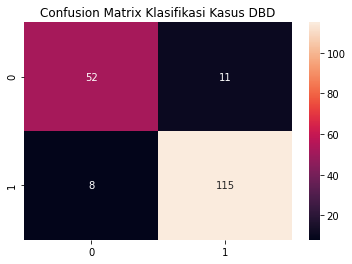

In [24]:
score_bnb = metrics.accuracy_score(testing_unigram, dt['Label'])
print("Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(testing_unigram, dt['Label']), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.show()

Accuracy:  0.5268817204301075


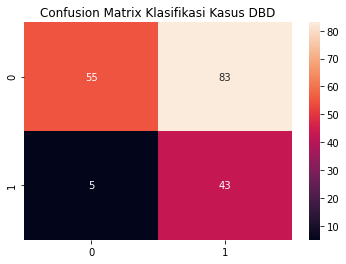

In [26]:
score_bnb = metrics.accuracy_score(testing_bigram, dt['Label'])
print("Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(testing_bigram, dt['Label']), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(dt['Label'], testing_unigram))
print(classification_report(dt['Label'], testing_bigram))

              precision    recall  f1-score   support

 Bukan Kasus       0.83      0.87      0.85        60
       Kasus       0.93      0.91      0.92       126

    accuracy                           0.90       186
   macro avg       0.88      0.89      0.88       186
weighted avg       0.90      0.90      0.90       186

              precision    recall  f1-score   support

 Bukan Kasus       0.40      0.92      0.56        60
       Kasus       0.90      0.34      0.49       126

    accuracy                           0.53       186
   macro avg       0.65      0.63      0.52       186
weighted avg       0.74      0.53      0.51       186

